<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectifs" data-toc-modified-id="Objectifs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectifs</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Importer-les-données" data-toc-modified-id="Importer-les-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importer les données</a></span></li><li><span><a href="#Créer-le-modèle" data-toc-modified-id="Créer-le-modèle-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Créer le modèle</a></span></li><li><span><a href="#Comprendre-les-paramètres-en-jouant-avec" data-toc-modified-id="Comprendre-les-paramètres-en-jouant-avec-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comprendre les paramètres en jouant avec</a></span><ul class="toc-item"><li><span><a href="#Nombre-de-neurones" data-toc-modified-id="Nombre-de-neurones-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Nombre de neurones</a></span></li></ul></li><li><span><a href="#Learning-Rate" data-toc-modified-id="Learning-Rate-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Learning Rate</a></span></li><li><span><a href="#Comprendre-la-courbe-d'apprentissage-(learning-curve)" data-toc-modified-id="Comprendre-la-courbe-d'apprentissage-(learning-curve)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Comprendre la courbe d'apprentissage (learning curve)</a></span></li><li><span><a href="#Utiliser-DropOut-et-Batch-Normalization" data-toc-modified-id="Utiliser-DropOut-et-Batch-Normalization-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Utiliser DropOut et Batch Normalization</a></span></li><li><span><a href="#Prédire" data-toc-modified-id="Prédire-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Prédire</a></span></li><li><span><a href="#Erreur" data-toc-modified-id="Erreur-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Erreur</a></span></li><li><span><a href="#Sauver-et-loader-un-modèle" data-toc-modified-id="Sauver-et-loader-un-modèle-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Sauver et loader un modèle</a></span></li><li><span><a href="#Tester-les-paramètres" data-toc-modified-id="Tester-les-paramètres-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Tester les paramètres</a></span></li></ul></div>

## Objectifs

- Créer un model simple de MLP
- Faire une prédiction
- Tester l'erreur
- Sauver le modèle et le loader

## Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns; sns.set_theme()
import numpy as np
from scipy import stats
import random
from collections import deque 
import os
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
import tensorflow as tf
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
%matplotlib inline
from joblib import Parallel, delayed
from scipy.stats import f_oneway
# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from matplotlib.patches import Patch
plt.rcParams["figure.figsize"] = (20,10)
import warnings
plt.rcParams["figure.autolayout"] = True
warnings.filterwarnings("ignore")

## Importer les données

In [3]:
X_train = pd.read_csv('/Users/mc/Documents/Cours/X_train_temperature_FR.txt', sep =' ', header=None)
Y_train = pd.read_csv('/Users/mc/Documents/Cours/Y_train_temperature_FR.txt', header=None)
print(X_train.shape)
print(Y_train.shape)

(1321, 10)
(1321, 1)


In [4]:
X_test = pd.read_csv('/Users/mc/Documents/Cours/X_test_temperature_FR.txt', sep =' ', header=None)
Y_test = pd.read_csv('/Users/mc/Documents/Cours/Y_test_temperature_FR.txt', header=None)
print(X_test.shape)
print(Y_test.shape)

(560, 10)
(560, 1)


## Créer le modèle

Keras est relativement simple d'utilisation, il faut commencer par:
- Sequential() afin dé débuter une séquence de couche
- Puis une seconde couche qui peut avoir plusieurs type. Ici nous prendrons une couche **Dense** qui correspond a une couche simple et totalement connecté aux couches suivantes. Dans cette première couche Dense il faut indiquer:
    - Le nombre de neurons que l'on veut dans cette couche
    - la fonction d'activation qui correspond à la fonction qui transformera les **inputs x weights**
    - input_dim correspond à la dimension de nos inputs. Nous avions décidé de prendre les 10 inputs précédents pour prédire l'input n+1. input_dim est donc égale à 10 et ne peut être changé que lorsque l'on change notre façon de préparer nos inputs (voir 01_preparation_de_donnees)
   
    
- il faut ensuite créer une deuxieme/dernière couche Dense qui représente la couche des outputs, ici on lui indique uniquement 1 neurons car l'on veut prédire une valeur unique

- Enfin il faut compiler le modèle en lui indiquant:
    - Un optimizer qui est un algorithme/équation en lui même et qui va modifier le poids des connections et/ou du learning rate. Il est aussi possible de rentrer sa propre fonction. On la définit la ligne au dessus en lui indiquant le **learning rate**, c'est à dire à quel point les connections seront updatés à chaque epoch
    - loss c'est la fonction qui permet de calculer l'erreur durant le training, il y a différentes fonctions comme mse, rmse. Il est aussi possible de rentrer sa propre fonction.
    
    
- A la fin on **fit** le modèle pour utiliser nos données et on lui donne donc comme argument:
    - X_train (nos valeurs pour prédire)
    - Y_train (la valeurs à prédire)
    - epochs (le nombre de fois que le modèle verra chaque exemple de notre training set)
    - verbose, s'il est égale à 0 on ne verra pas ce qu'il se passe, à 1 on aura la totalité des informations durant le training (errreur par epoch, temps par step) et enfin à deux on aura une information partielle de l'évolution

In [4]:
n_steps = 10

tf.keras.backend.clear_session()

# define model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=n_steps))
model.add(Dense(1))

opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss='mse')

# fit model
history = model.fit(X_train, Y_train, epochs=10, verbose=1)

Metal device set to: Apple M1
Epoch 1/10


2022-04-24 14:30:08.037950: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-24 14:30:08.038102: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-24 14:30:08.102949: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-24 14:30:08.206071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


42/42 [==============================] - 0s 3ms/step - loss: 0.4959
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: 0.1197
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 0.1021
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: 0.0925
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 0.0871
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 0.0842
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: 0.0835
Epoch 8/10
42/42 [==============================] - 0s 4ms/step - loss: 0.0819
Epoch 9/10
42/42 [==============================] - 0s 4ms/step - loss: 0.0786
Epoch 10/10
42/42 [==============================] - 0s 3ms/step - loss: 0.0773


## Comprendre les paramètres en jouant avec
### Nombre de neurones
- (1) Faire un plot de la loss fonction en fonction des epochs
    - Tips: history.history
    
- (2) Changer la taille de la première couche avec 10, 100 puis 1000 neurones et ploter le résultats sur un même graphe

2022-04-24 14:30:09.803743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 14:30:11.060867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 14:30:12.356304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


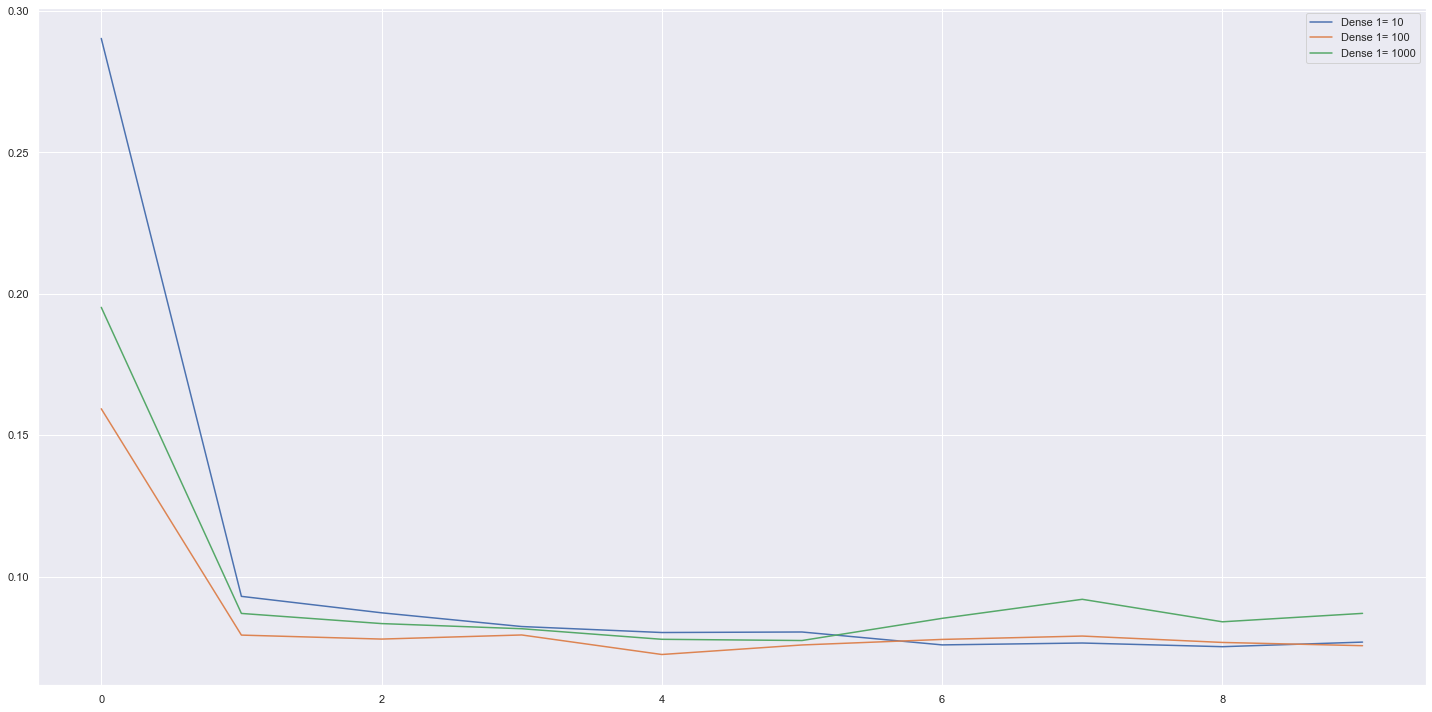

## Learning Rate
- (1) Faire un plot de la loss fonction en fonction des epochs
    - Tips: history.history
    
- (2) Changer la taille du learning rate en 0.001, 0.01 et 0.5 et ploter le résultats sur un même graphe

2022-04-24 19:52:14.998412: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-24 19:52:14.998639: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


2022-04-24 19:52:15.564178: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-24 19:52:15.671964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 19:52:18.768473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 19:52:20.153824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


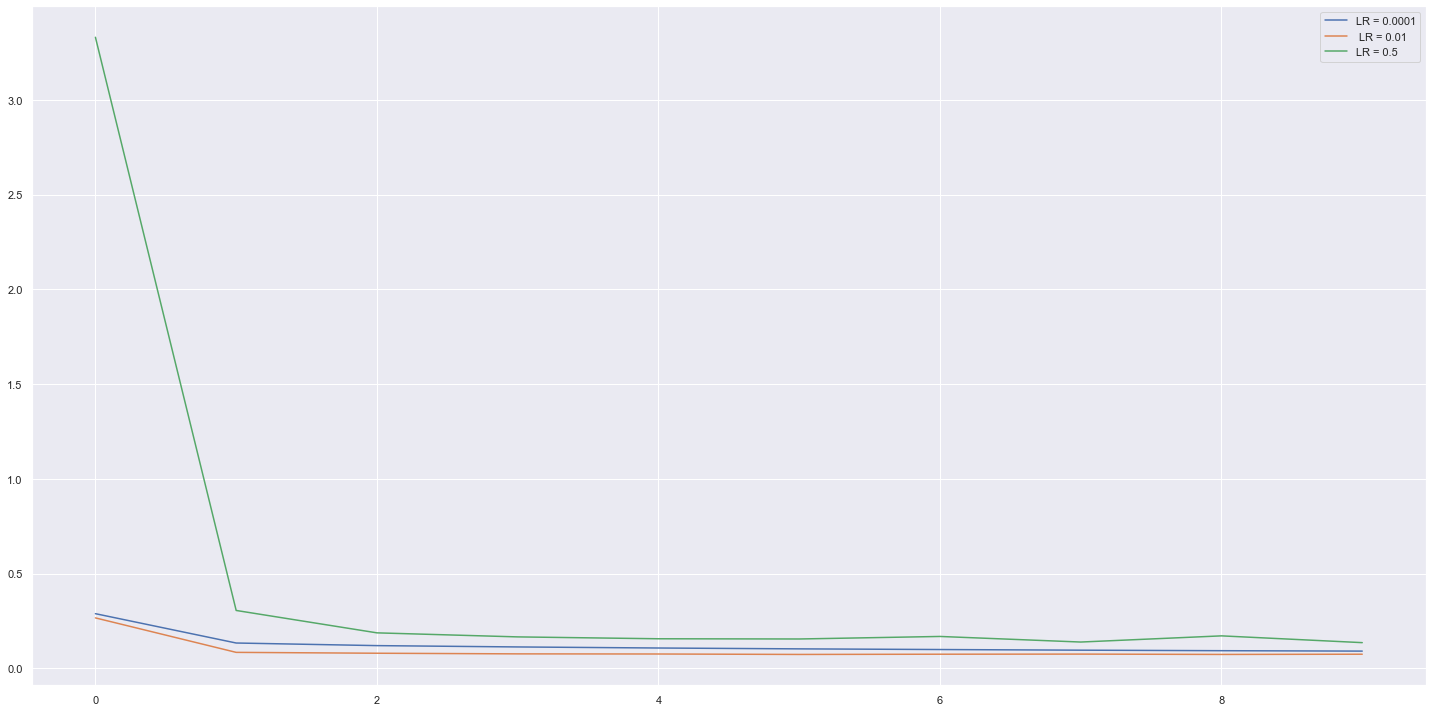

## Comprendre la courbe d'apprentissage (learning curve)

On peut également utiliser notre testing set pour voir comment notre algorithme s'améliore sur des données qu'il n'a pas vu et pour lesquels il n'est pas entrainé. Pour se faire on rajoute simplement:
   - validation_data=(X_test, Y_test) dans le model.fit
   
   
- (1) Faire un plot de la loss et val_loss fonction en utilisant différent learning rate
- (2) Faire un plot de val_loss fonction en utilisant différent epoch dont un avec 1000 epoch (et aller prendre un café en attendant)

2022-04-24 19:52:27.127748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 19:52:27.348589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 19:52:28.989484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 19:52:29.191225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


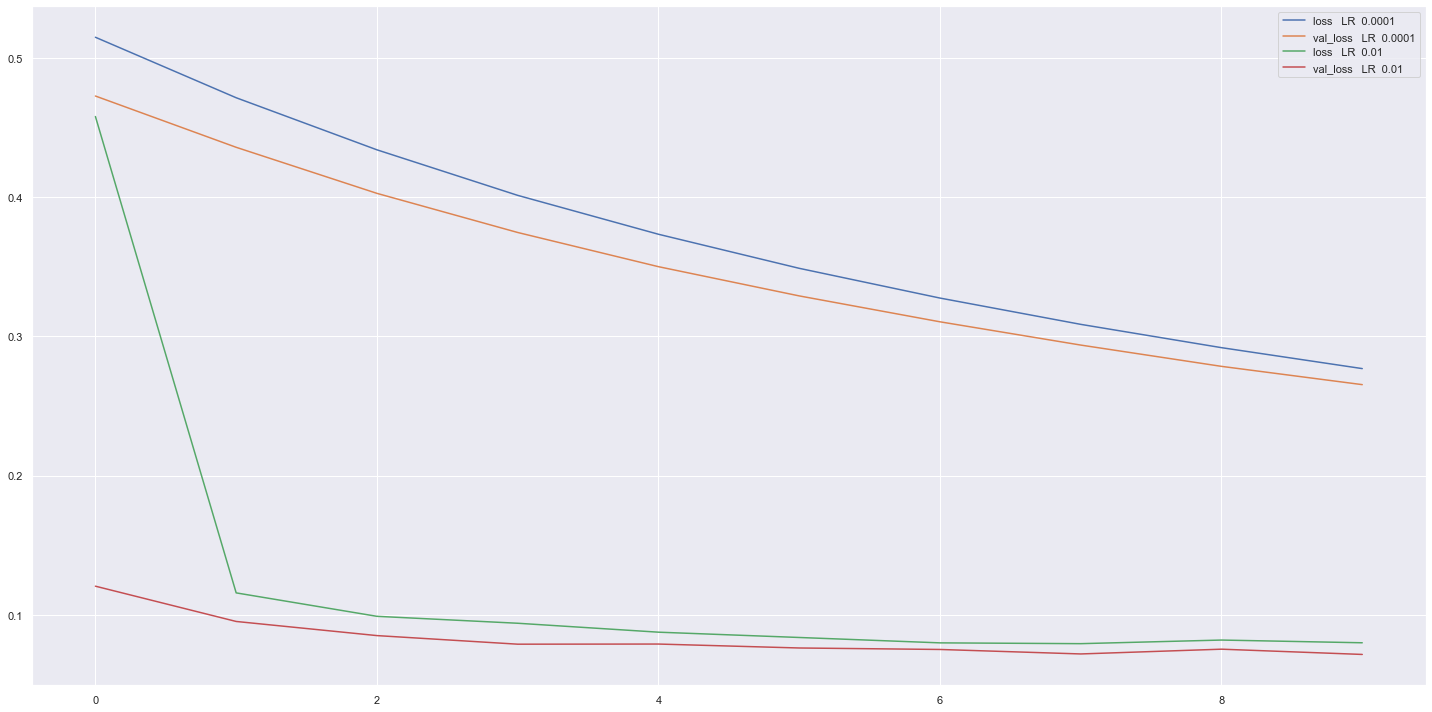

2022-04-24 19:52:34.216357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 19:52:34.419578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 19:52:36.108757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 19:52:36.324800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


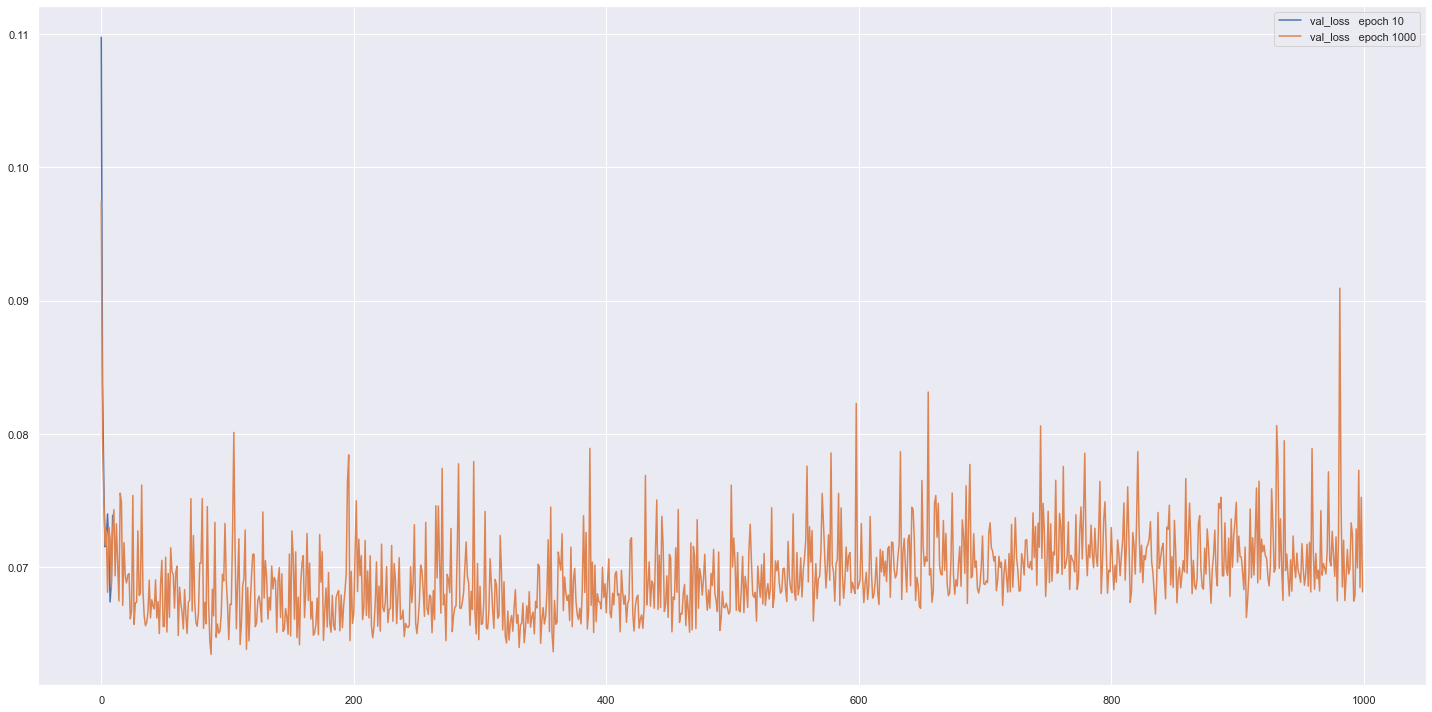

## Utiliser DropOut et Batch Normalization

2022-04-24 19:56:56.505331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 19:56:57.889567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 19:56:59.376404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


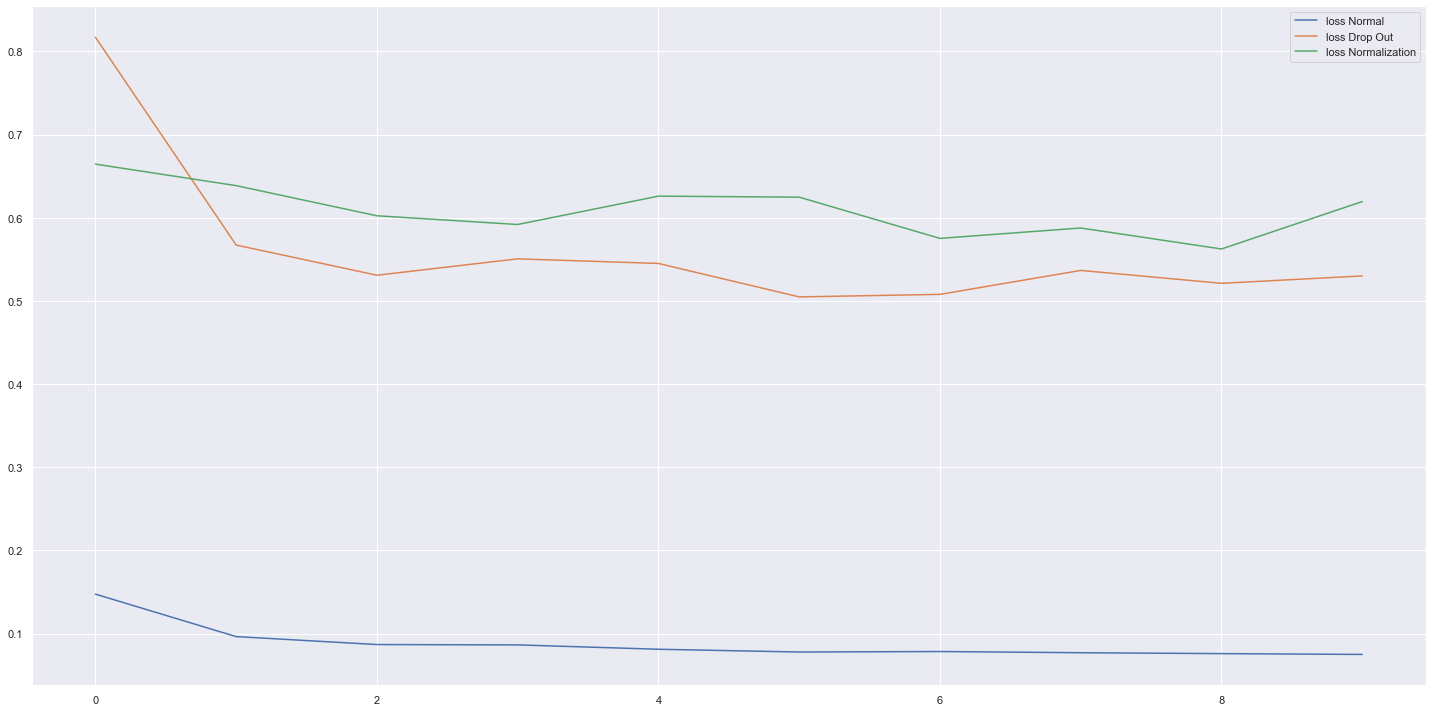

## Prédire

Pour prédire avec Keras c'est relativement simple, il faut simplement utiliser la fonction **predict** sur les valeurs que l'on veut. Il faut savoir qu'il est indispensable d'avoir scaled ces valeurs de la même façon qu'ont été celle du training. 

- (1) Utiliser la fonction predict sur le X_test
- (2) Faire un plot des valeurs prédites et de Y_test sur le même graphe
- (3) rescale en utilisant:
    - load(open('scaler_fr.pkl', 'rb')) puis
    - .inverse_transform

2022-04-24 19:57:25.200189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 19:57:26.428550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


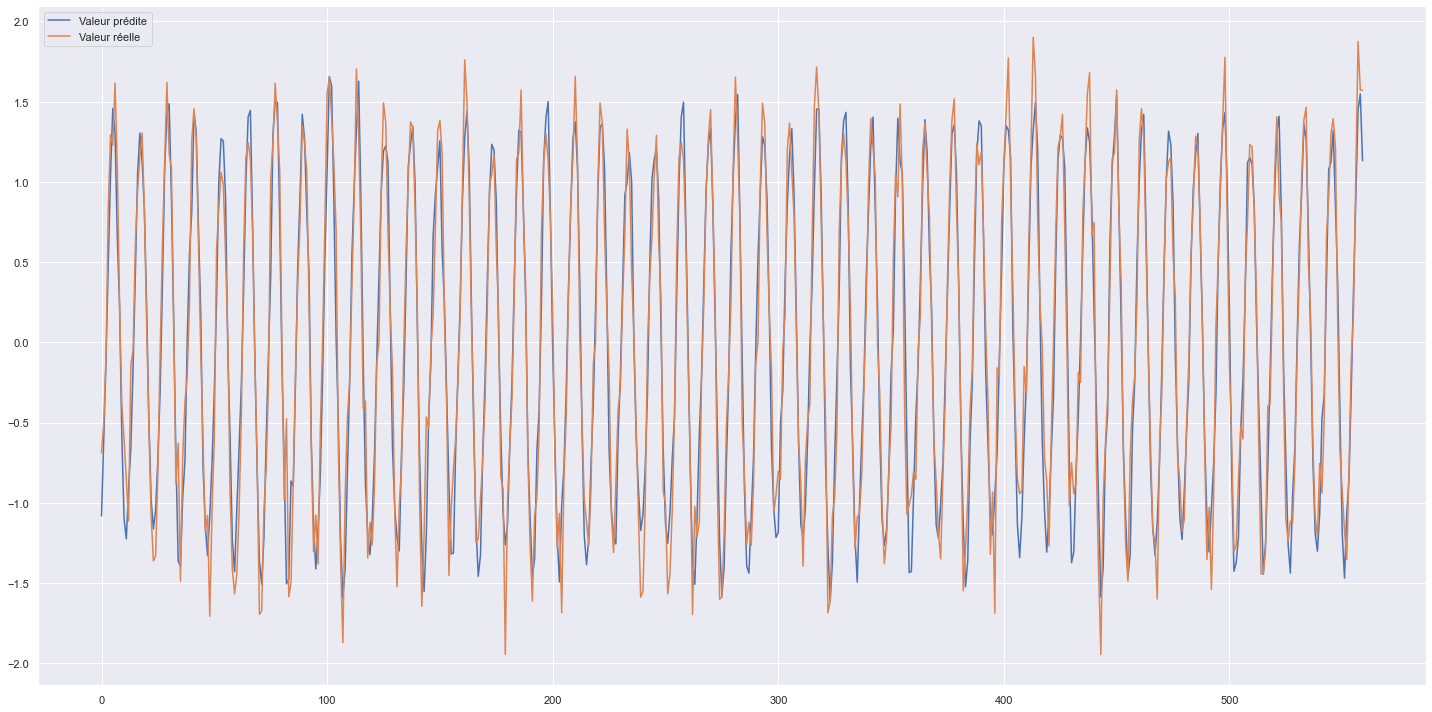

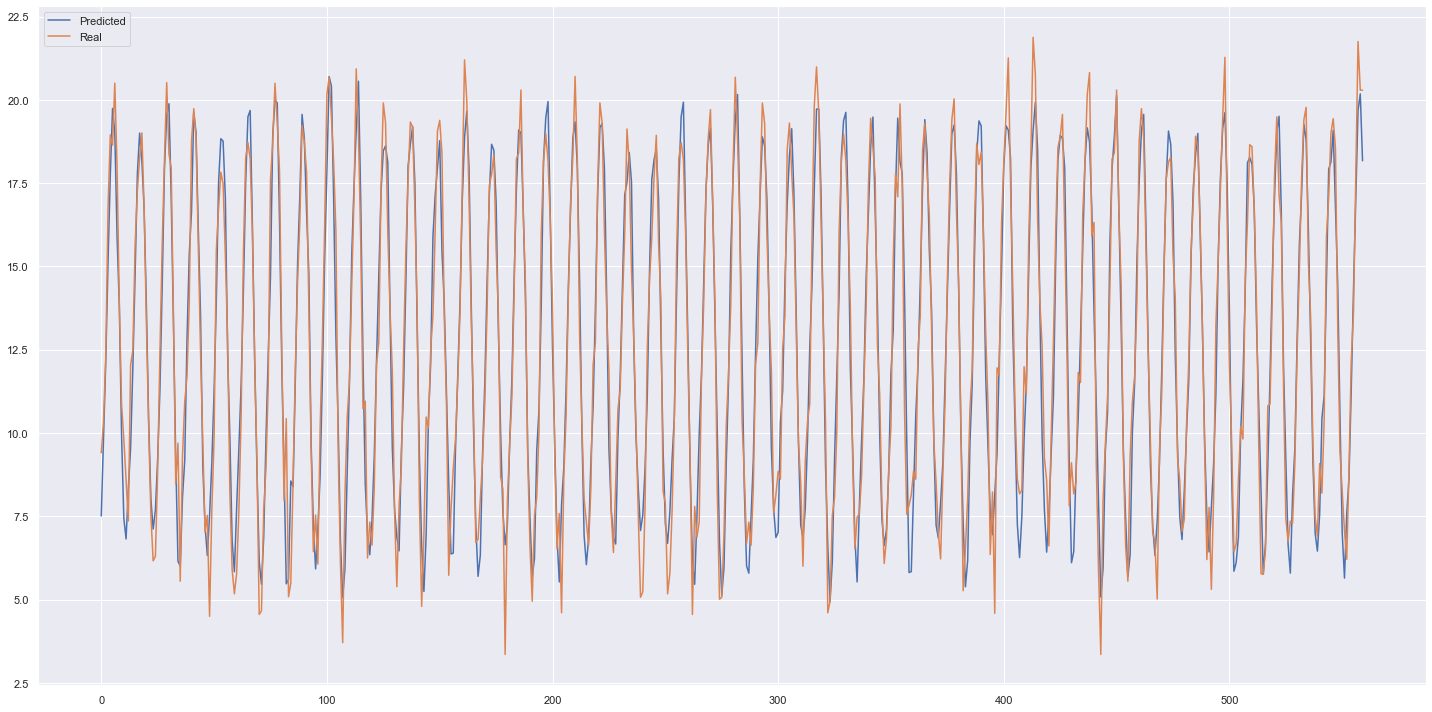

## Erreur
Il existe énormément de façon de mesurer l'erreur les plus connues et utilisées sont:
   - Mean Absolute error, qui permet de regarder l'erreur absolue c'est à dire peut importe si les valeurs sont positives ou négatives
   - Mean square error, qui met plus en avant les erreurs larges car il est porte les erreurs au carré
   - Root square mean error, c'est la même que la précédente sauf que les erreurs sont d'abords porté à la racine et vont donc être moins fort pour les large erreurs
   
- (1) Faire le calcul de la MSE, RMSE, MAE en utilisant les fonctions de sklearn 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

- (2) Faire un plot bar de ces erreurs sur le même graphe

<AxesSubplot:>

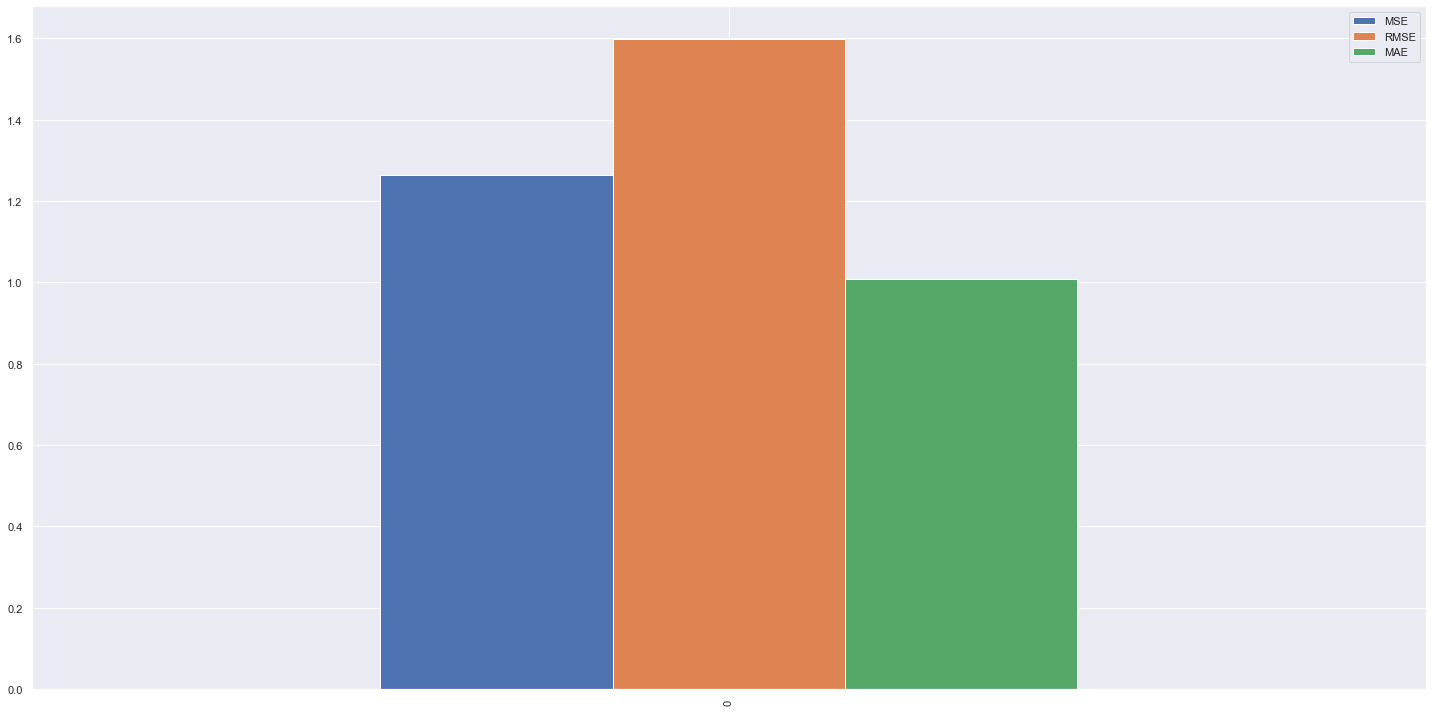

## Sauver et loader un modèle

In [ ]:
model.save('model_temperature_fr')
model = keras.models.load_model('model_temperature_fr')

## Tester les paramètres
- Vous avez maintenant beaucoup d'élément pour tester et trouver les meilleurs paramètres pour votre erreur. 